In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fminbound

In [3]:
# Defining Maximize Function and its maximizer on interval [a, b]

def maximum(V, a, b):
    return float(V(fminbound(lambda x: -V(x), a, b)))

def maximizer(V, a, b):
    return float(fminbound(lambda x: -V(x), a, b))

In [8]:
### Setting Economic Environment

# Defining Basic Function

def u(c, σ = 2):
    return (c**(1 - σ)) / (1 - σ)

# Assigning Parameters
ρ = 0.06 ;  β = 1 / (1 + ρ) ; r = 0.04 

# Saving's Grid
A_l = 0.001 
A_h = 50
grid_min = A_l ; grid_max = A_h; grid_size = 200
a_grid = np.linspace(grid_min, grid_max, grid_size)



# Case 1. σ_y = 0.3, δ = 0.95

In [58]:
σ_y = 0.3 # Income Volatility
y_l = 1 - σ_y ; y_h =  1 + σ_y # Two possible income process
δ = 0.95 # Persistence of income process

π = np.array( [[ (1+δ)/2, (1-δ)/2 ], [ (1-δ)/2, (1+δ)/2 ]] )

In [59]:
## Value Function Iteartion

# Initial guess

V_l = interp1d(a_grid, a_grid)
V_h = interp1d(a_grid, a_grid)

# Iteration process
max_iter = 1000
tol = 1e-06
count = 0

while count < max_iter:
    
    vals = []
    for a in a_grid:
        y = y_l
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * V_l(a_prime) + π[0,1] * V_h(a_prime))
        vals.append(float(maximum(h, A_l, a_max)))
        
    V_l1 = interp1d(a_grid, vals)
    
    vals = []
    for a in a_grid:
        y = y_h
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * V_l(a_prime) + π[0,0] * V_h(a_prime))
        vals.append(float(maximum(h, A_l, a_max)))
        
    V_h1 = interp1d(a_grid, vals)
    
    err1 =  np.max(np.abs(V_l1(a_grid) - V_l(a_grid)))
    err2 =  np.max(np.abs(V_h1(a_grid) - V_h(a_grid)))
    err = np.max(np.array([err1, err2]))

    
    if err < tol:
        print('The Final Number of iteration is', count)
        print('with error', err)
        break 
        
    V_l = V_l1
    V_h = V_h1
    
    count += 1
    
    if int(count) % 50 == 0:
        print('The Current Number of iteration is', count)

The Current Number of iteration is 50
The Current Number of iteration is 100
The Current Number of iteration is 150
The Current Number of iteration is 200
The Final Number of iteration is 240
with error 9.911966580844478e-07


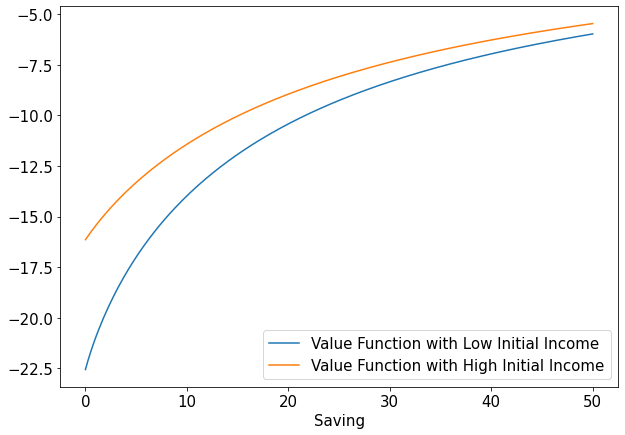

In [60]:
plt.figure(figsize = (10,7) )
plt.plot(grid, V_l(grid), label = 'Value Function with Low Initial Income')
plt.plot(grid, V_h(grid), label = 'Value Function with High Initial Income')
plt.legend(fontsize = 15)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

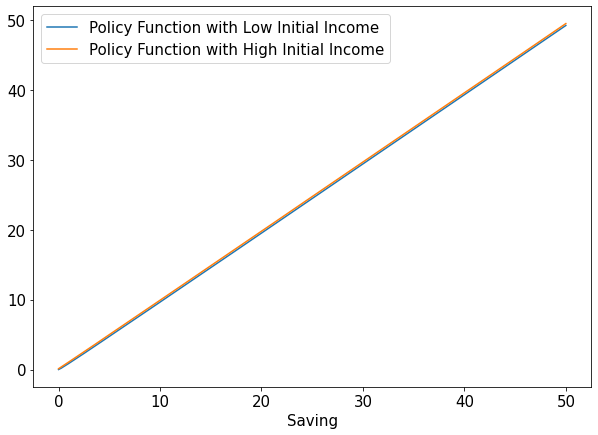

In [61]:
## Corresponding Policy Function

# Defining Policy Function

def policy_l(w,z):
    vals = []
    for a in a_grid:
        y = y_l
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * w(a_prime) + π[0,1] * z(a_prime))
        vals.append(float(maximizer(h, A_l, a_max)))
        
    return interp1d(a_grid, vals, kind = 'linear')        

def policy_h(w,z):
    vals = []
    for a in a_grid:
        y = y_h
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * w(a_prime) + π[0,0] * z(a_prime))
        vals.append(float(maximizer(h, A_l, a_max)))
        
    return interp1d(a_grid, vals, kind = 'linear')        


p_l = policy_l(V_l, V_h)
p_h = policy_h(V_l, V_h)

plt.figure(figsize = (10,7))
plt.plot(grid, p_l(grid), label = 'Policy Function with Low Initial Income')
plt.plot(grid, p_h(grid), label = 'Policy Function with High Initial Income')
plt.legend(fontsize = 15)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Case 2. σ_y = 0.1, δ = 0.95

In [62]:
σ_y = 0.1 # Income Volatility
y_l = 1 - σ_y ; y_h =  1 + σ_y # Two possible income process
δ = 0.95 # Persistence of income process

π = np.array( [[ (1+δ)/2, (1-δ)/2 ], [ (1-δ)/2, (1+δ)/2 ]] )

In [63]:
## Value Function Iteartion

# Initial guess

V_l = interp1d(a_grid, a_grid)
V_h = interp1d(a_grid, a_grid)

# Iteration process
max_iter = 1000
tol = 1e-06
count = 0

while count < max_iter:
    
    vals = []
    for a in a_grid:
        y = y_l
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * V_l(a_prime) + π[0,1] * V_h(a_prime))
        vals.append(float(maximum(h, A_l, a_max)))
        
    V_l1 = interp1d(a_grid, vals)
    
    vals = []
    for a in a_grid:
        y = y_h
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * V_l(a_prime) + π[0,0] * V_h(a_prime))
        vals.append(float(maximum(h, A_l, a_max)))
        
    V_h1 = interp1d(a_grid, vals)
    
    err1 =  np.max(np.abs(V_l1(a_grid) - V_l(a_grid)))
    err2 =  np.max(np.abs(V_h1(a_grid) - V_h(a_grid)))
    err = np.max(np.array([err1, err2]))

    
    if err < tol:
        print('The Final Number of iteration is', count)
        print('with error', err)
        break 
        
    V_l = V_l1
    V_h = V_h1
    
    count += 1
    
    if int(count) % 50 == 0:
        print('The Current Number of iteration is', count)

The Current Number of iteration is 50
The Current Number of iteration is 100
The Current Number of iteration is 150
The Current Number of iteration is 200
The Final Number of iteration is 238
with error 9.588929223980358e-07


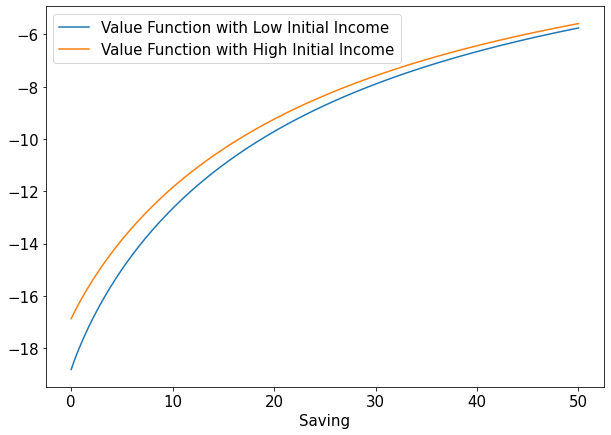

In [64]:
plt.figure(figsize = (10,7) )
plt.plot(grid, V_l(grid), label = 'Value Function with Low Initial Income')
plt.plot(grid, V_h(grid), label = 'Value Function with High Initial Income')
plt.legend(fontsize = 15)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

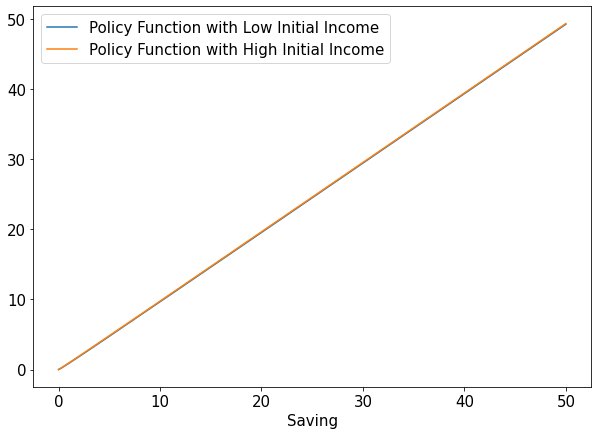

In [65]:
## Corresponding Policy Function

# Defining Policy Function

def policy_l(w,z):
    vals = []
    for a in a_grid:
        y = y_l
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * w(a_prime) + π[0,1] * z(a_prime))
        vals.append(float(maximizer(h, A_l, a_max)))
        
    return interp1d(a_grid, vals, kind = 'linear')        

def policy_h(w,z):
    vals = []
    for a in a_grid:
        y = y_h
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * w(a_prime) + π[0,0] * z(a_prime))
        vals.append(float(maximizer(h, A_l, a_max)))
        
    return interp1d(a_grid, vals, kind = 'linear')        


p_l = policy_l(V_l, V_h)
p_h = policy_h(V_l, V_h)

plt.figure(figsize = (10,7))
plt.plot(grid, p_l(grid), label = 'Policy Function with Low Initial Income')
plt.plot(grid, p_h(grid), label = 'Policy Function with High Initial Income')
plt.legend(fontsize = 15)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Case 3. σ_y = 0.3, δ = 0.05

In [66]:
σ_y = 0.3 # Income Volatility
y_l = 1 - σ_y ; y_h =  1 + σ_y # Two possible income process
δ = 0.05 # Persistence of income process

π = np.array( [[ (1+δ)/2, (1-δ)/2 ], [ (1-δ)/2, (1+δ)/2 ]] )

In [67]:
## Value Function Iteartion

# Initial guess

V_l = interp1d(a_grid, a_grid)
V_h = interp1d(a_grid, a_grid)

# Iteration process
max_iter = 1000
tol = 1e-06
count = 0

while count < max_iter:
    
    vals = []
    for a in a_grid:
        y = y_l
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * V_l(a_prime) + π[0,1] * V_h(a_prime))
        vals.append(float(maximum(h, A_l, a_max)))
        
    V_l1 = interp1d(a_grid, vals)
    
    vals = []
    for a in a_grid:
        y = y_h
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * V_l(a_prime) + π[0,0] * V_h(a_prime))
        vals.append(float(maximum(h, A_l, a_max)))
        
    V_h1 = interp1d(a_grid, vals)
    
    err1 =  np.max(np.abs(V_l1(a_grid) - V_l(a_grid)))
    err2 =  np.max(np.abs(V_h1(a_grid) - V_h(a_grid)))
    err = np.max(np.array([err1, err2]))

    
    if err < tol:
        print('The Final Number of iteration is', count)
        print('with error', err)
        break 
        
    V_l = V_l1
    V_h = V_h1
    
    count += 1
    
    if int(count) % 50 == 0:
        print('The Current Number of iteration is', count)

The Current Number of iteration is 50
The Current Number of iteration is 100
The Current Number of iteration is 150
The Current Number of iteration is 200
The Final Number of iteration is 238
with error 9.787632677671354e-07


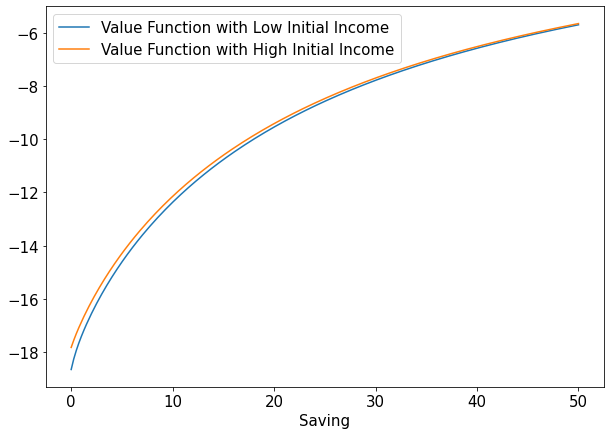

In [68]:
plt.figure(figsize = (10,7) )
plt.plot(grid, V_l(grid), label = 'Value Function with Low Initial Income')
plt.plot(grid, V_h(grid), label = 'Value Function with High Initial Income')
plt.legend(fontsize = 15)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

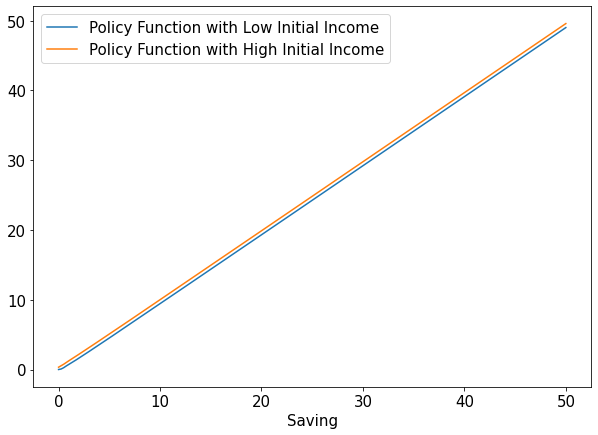

In [69]:
## Corresponding Policy Function

# Defining Policy Function

def policy_l(w,z):
    vals = []
    for a in a_grid:
        y = y_l
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * w(a_prime) + π[0,1] * z(a_prime))
        vals.append(float(maximizer(h, A_l, a_max)))
        
    return interp1d(a_grid, vals, kind = 'linear')        

def policy_h(w,z):
    vals = []
    for a in a_grid:
        y = y_h
        a_max = min(A_h, y + (1 + r) * a)
        h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * w(a_prime) + π[0,0] * z(a_prime))
        vals.append(float(maximizer(h, A_l, a_max)))
        
    return interp1d(a_grid, vals, kind = 'linear')        


p_l = policy_l(V_l, V_h)
p_h = policy_h(V_l, V_h)

plt.figure(figsize = (10,7))
plt.plot(grid, p_l(grid), label = 'Policy Function with Low Initial Income')
plt.plot(grid, p_h(grid), label = 'Policy Function with High Initial Income')
plt.legend(fontsize = 15)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Case 4. σ_y = 0.3, δ -> 1

In [51]:
σ_y = 0.3 # Income Volatility
y_l = 1 - σ_y ; y_h =  1 + σ_y # Two possible income process

# Sequence of δ
δ_sec = np.array([0.9, 0.95, 0.99, 0.999, 0.9999]) # Persistence of income process

The Final Number of iteration is 240
with error 9.727384027158337e-07
The Final Number of iteration is 240
with error 9.911966580844478e-07
The Final Number of iteration is 240
with error 9.70326222038409e-07
The Final Number of iteration is 243
with error 9.652483736743989e-07
The Final Number of iteration is 244
with error 9.505302891454903e-07


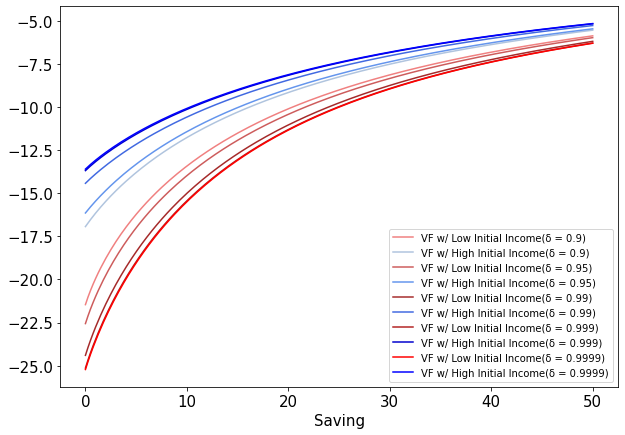

In [52]:
## Value Function Iteartion


# Iteration process
max_iter = 1000
tol = 1e-06


plt.figure(figsize = (10,7))
color_l = ['lightcoral', 'indianred', 'brown', 'firebrick', 'red']
color_h = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'blue']


for i in range(len(δ_sec)):
    π = np.array( [[ (1+δ_sec[i])/2, (1-δ_sec[i])/2 ], [ (1-δ_sec[i])/2, (1+δ_sec[i])/2 ]] )
    
    V_l = interp1d(a_grid, a_grid)
    V_h = interp1d(a_grid, a_grid)
    count = 0
    
    
    while count < max_iter:
    
        vals = []
        for a in a_grid:
            y = y_l
            a_max = min(A_h, y + (1 + r) * a)
            h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * V_l(a_prime) + π[0,1] * V_h(a_prime))
            vals.append(float(maximum(h, A_l, a_max)))
        
        V_l1 = interp1d(a_grid, vals)
    
        vals = []
        for a in a_grid:
            y = y_h
            a_max = min(A_h, y + (1 + r) * a)
            h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * V_l(a_prime) + π[0,0] * V_h(a_prime))
            vals.append(float(maximum(h, A_l, a_max)))
        
        V_h1 = interp1d(a_grid, vals)
    
        err1 =  np.max(np.abs(V_l1(a_grid) - V_l(a_grid)))
        err2 =  np.max(np.abs(V_h1(a_grid) - V_h(a_grid)))
        err = np.max(np.array([err1, err2]))

    
        if err < tol:
            print('The Final Number of iteration is', count)
            print('with error', err)
            break 
        
        V_l = V_l1
        V_h = V_h1
    
        count += 1
    
    
    plt.plot(grid, V_l(grid), label = 'VF w/ Low Initial Income(δ = {})'.format(δ_sec[i]), color = color_l[i])
    plt.plot(grid, V_h(grid), label = 'VF w/ High Initial Income(δ = {})'.format(δ_sec[i]), color = color_h[i])
plt.legend(fontsize = 10)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

The Final Number of iteration is 240
with error 9.727384027158337e-07
The Final Number of iteration is 240
with error 9.911966580844478e-07
The Final Number of iteration is 240
with error 9.70326222038409e-07
The Final Number of iteration is 243
with error 9.652483736743989e-07
The Final Number of iteration is 244
with error 9.505302891454903e-07


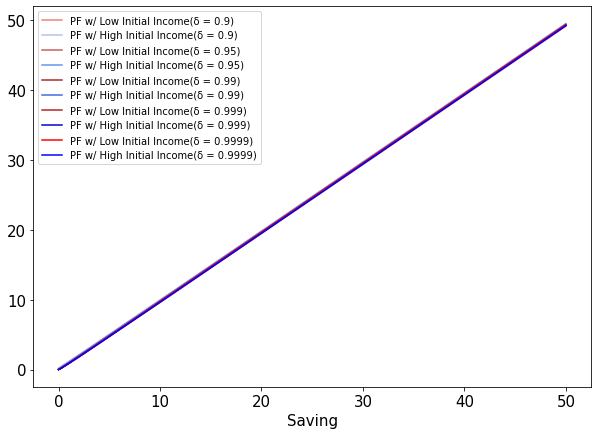

In [54]:
## Value Function Iteartion


# Iteration process
max_iter = 1000
tol = 1e-06


plt.figure(figsize = (10,7))
color_l = ['lightcoral', 'indianred', 'brown', 'firebrick', 'red']
color_h = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'blue']


for i in range(len(δ_sec)):
    π = np.array( [[ (1+δ_sec[i])/2, (1-δ_sec[i])/2 ], [ (1-δ_sec[i])/2, (1+δ_sec[i])/2 ]] )
    
    V_l = interp1d(a_grid, a_grid)
    V_h = interp1d(a_grid, a_grid)
    count = 0
    
    
    while count < max_iter:
    
        vals = []
        for a in a_grid:
            y = y_l
            a_max = min(A_h, y + (1 + r) * a)
            h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * V_l(a_prime) + π[0,1] * V_h(a_prime))
            vals.append(float(maximum(h, A_l, a_max)))
        
        V_l1 = interp1d(a_grid, vals)
    
        vals = []
        for a in a_grid:
            y = y_h
            a_max = min(A_h, y + (1 + r) * a)
            h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * V_l(a_prime) + π[0,0] * V_h(a_prime))
            vals.append(float(maximum(h, A_l, a_max)))
        
        V_h1 = interp1d(a_grid, vals)
    
        err1 =  np.max(np.abs(V_l1(a_grid) - V_l(a_grid)))
        err2 =  np.max(np.abs(V_h1(a_grid) - V_h(a_grid)))
        err = np.max(np.array([err1, err2]))

    
        if err < tol:
            print('The Final Number of iteration is', count)
            print('with error', err)
            break 
        
        V_l = V_l1
        V_h = V_h1
    
        count += 1
    
    
    p_l = policy_l(V_l, V_h)
    p_h = policy_h(V_l, V_h)

    
    plt.plot(grid, p_l(grid), label = 'PF w/ Low Initial Income(δ = {})'.format(δ_sec[i]), color = color_l[i])
    plt.plot(grid, p_h(grid), label = 'PF w/ High Initial Income(δ = {})'.format(δ_sec[i]), color = color_h[i])

plt.legend(fontsize = 10)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

# Case 5. σ_y = 0.3, δ -> -1

In [55]:
σ_y = 0.3 # Income Volatility
y_l = 1 - σ_y ; y_h =  1 + σ_y # Two possible income process

# Sequence of δ
δ_sec = np.array([-0.9, -0.95, -0.99, -0.999, -0.9999]) # Persistence of income process

The Final Number of iteration is 238
with error 9.56010394403961e-07
The Final Number of iteration is 238
with error 9.544769135061415e-07
The Final Number of iteration is 238
with error 9.809290002493753e-07
The Final Number of iteration is 241
with error 9.830178555603197e-07
The Final Number of iteration is 242
with error 9.677759216231152e-07


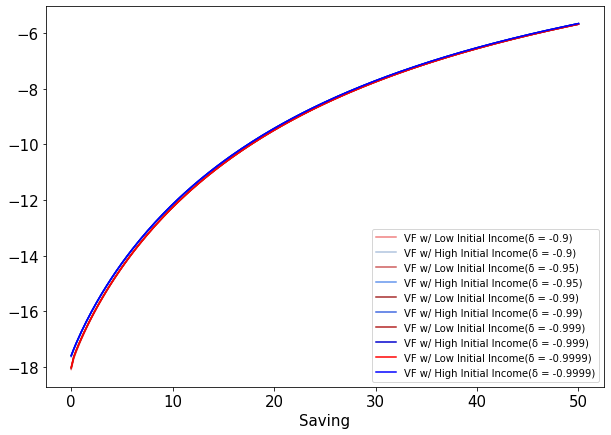

In [56]:
## Value Function Iteartion


# Iteration process
max_iter = 1000
tol = 1e-06


plt.figure(figsize = (10,7))
color_l = ['lightcoral', 'indianred', 'brown', 'firebrick', 'red']
color_h = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'blue']

for i in range(len(δ_sec)):
    π = np.array( [[ (1+δ_sec[i])/2, (1-δ_sec[i])/2 ], [ (1-δ_sec[i])/2, (1+δ_sec[i])/2 ]] )
    
    V_l = interp1d(a_grid, a_grid)
    V_h = interp1d(a_grid, a_grid)
    count = 0
    
    
    while count < max_iter:
    
        vals = []
        for a in a_grid:
            y = y_l
            a_max = min(A_h, y + (1 + r) * a)
            h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * V_l(a_prime) + π[0,1] * V_h(a_prime))
            vals.append(float(maximum(h, A_l, a_max)))
        
        V_l1 = interp1d(a_grid, vals)
    
        vals = []
        for a in a_grid:
            y = y_h
            a_max = min(A_h, y + (1 + r) * a)
            h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * V_l(a_prime) + π[0,0] * V_h(a_prime))
            vals.append(float(maximum(h, A_l, a_max)))
        
        V_h1 = interp1d(a_grid, vals)
    
        err1 =  np.max(np.abs(V_l1(a_grid) - V_l(a_grid)))
        err2 =  np.max(np.abs(V_h1(a_grid) - V_h(a_grid)))
        err = np.max(np.array([err1, err2]))

    
        if err < tol:
            print('The Final Number of iteration is', count)
            print('with error', err)
            break 
        
        V_l = V_l1
        V_h = V_h1
    
        count += 1
    

    
    plt.plot(grid, V_l(grid), label = 'VF w/ Low Initial Income(δ = {})'.format(δ_sec[i]), color = color_l[i])
    plt.plot(grid, V_h(grid), label = 'VF w/ High Initial Income(δ = {})'.format(δ_sec[i]), color = color_h[i])

plt.legend(fontsize = 10)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

The Final Number of iteration is 238
with error 9.56010394403961e-07
The Final Number of iteration is 238
with error 9.544769135061415e-07
The Final Number of iteration is 238
with error 9.809290002493753e-07
The Final Number of iteration is 241
with error 9.830178555603197e-07
The Final Number of iteration is 242
with error 9.677759216231152e-07


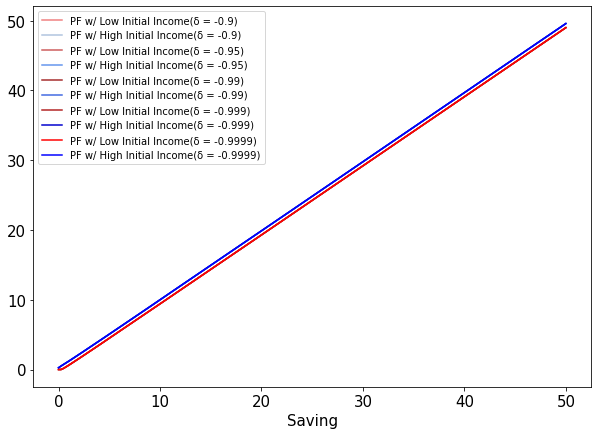

In [57]:
## Value Function Iteartion


# Iteration process
max_iter = 1000
tol = 1e-06


plt.figure(figsize = (10,7))
color_l = ['lightcoral', 'indianred', 'brown', 'firebrick', 'red']
color_h = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'blue']


for i in range(len(δ_sec)):
    π = np.array( [[ (1+δ_sec[i])/2, (1-δ_sec[i])/2 ], [ (1-δ_sec[i])/2, (1+δ_sec[i])/2 ]] )
    
    V_l = interp1d(a_grid, a_grid)
    V_h = interp1d(a_grid, a_grid)
    count = 0
    
    
    while count < max_iter:
    
        vals = []
        for a in a_grid:
            y = y_l
            a_max = min(A_h, y + (1 + r) * a)
            h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[0,0] * V_l(a_prime) + π[0,1] * V_h(a_prime))
            vals.append(float(maximum(h, A_l, a_max)))
        
        V_l1 = interp1d(a_grid, vals)
    
        vals = []
        for a in a_grid:
            y = y_h
            a_max = min(A_h, y + (1 + r) * a)
            h = lambda a_prime: u(max(y + (1 + r) * a - a_prime, 0)) + β * ( π[1,0] * V_l(a_prime) + π[0,0] * V_h(a_prime))
            vals.append(float(maximum(h, A_l, a_max)))
        
        V_h1 = interp1d(a_grid, vals)
    
        err1 =  np.max(np.abs(V_l1(a_grid) - V_l(a_grid)))
        err2 =  np.max(np.abs(V_h1(a_grid) - V_h(a_grid)))
        err = np.max(np.array([err1, err2]))

    
        if err < tol:
            print('The Final Number of iteration is', count)
            print('with error', err)
            break 
        
        V_l = V_l1
        V_h = V_h1
    
        count += 1
    
    
    p_l = policy_l(V_l, V_h)
    p_h = policy_h(V_l, V_h)

    
    plt.plot(grid, p_l(grid), label = 'PF w/ Low Initial Income(δ = {})'.format(δ_sec[i]), color = color_l[i])
    plt.plot(grid, p_h(grid), label = 'PF w/ High Initial Income(δ = {})'.format(δ_sec[i]), color = color_h[i])

plt.legend(fontsize = 10)
plt.xlabel('Saving', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()